# Overlapping Mixtures of Gaussian Processses

*Valentine Svensson 2015 <br> (with small edits by James Hensman November 2015) 
converted to GPflow by Daniel Marthaler September 2016*

This illustrates use of the OMGP model described in

**Overlapping Mixtures of Gaussian Processes for the data association problem**  
_Miguel Lázaro-Gredilla, Steven Van Vaerenbergh, Neil D. Lawrence_  
Pattern Recognition 2012

The GPclust implementation makes use of the collapsed variational mixture model for GP assignment.

In [1]:
%matplotlib inline
import numpy as np
import gpflow
from gpclust import OMGP
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
from matplotlib import pyplot as plt

## Diverging trend seperation

One application of the OMGP model could be to find diverging trends among populations over time. Imagine for example two species evolving from a common ancestor over time.

We load some pre-generated data which diverge over time.

In [2]:
XY = np.loadtxt('../data/split_data_test.csv', delimiter=',', skiprows=1, usecols=[1, 2])
X = XY[:, 0, None]
Y = XY[:, 1, None]

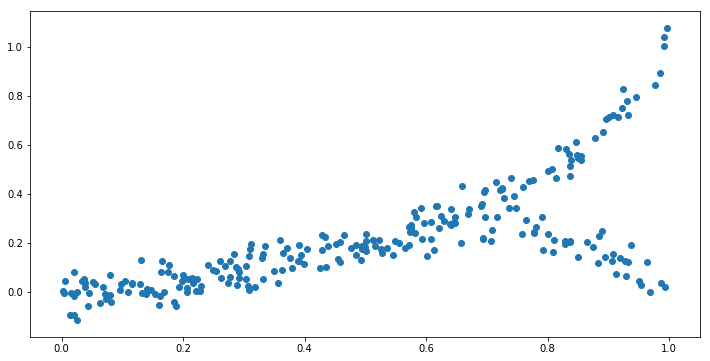

In [3]:
plt.scatter(X, Y);

We define a model assuming `num_clusters` = 2 trends. By default the model will be populated by `num_clusters` RBF kernels. The OMGP implementation is compatible with most kernels in GPflow, so that you for example can encode periodicity in the model.

In [4]:
m = OMGP(X, Y, num_clusters=2, noise_variance=0.01, prior_Z='DP')
m.log_likelihood()

919.6110193456243

A simple plot function is included which illustrates the asignment probability for each data point, it also shows the posterior mean and confidence intervals for each Gaussian Process.

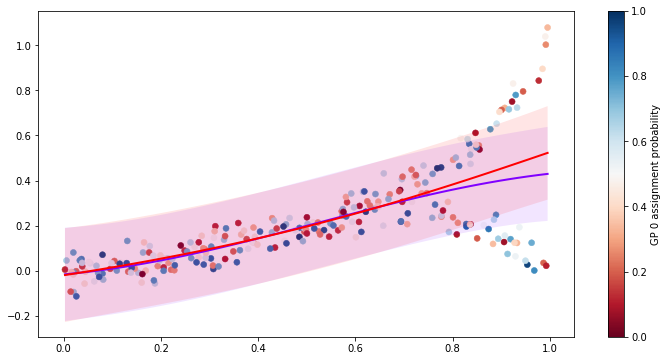

In [5]:
from plotter import OMGPplot
OMGPplot(m,X,Y)

There is also a function for plotting the assignment probability for a given GP directly. Since we haven't optimized the mixture parameters yet the assignment probability is just a random draw from the prior.

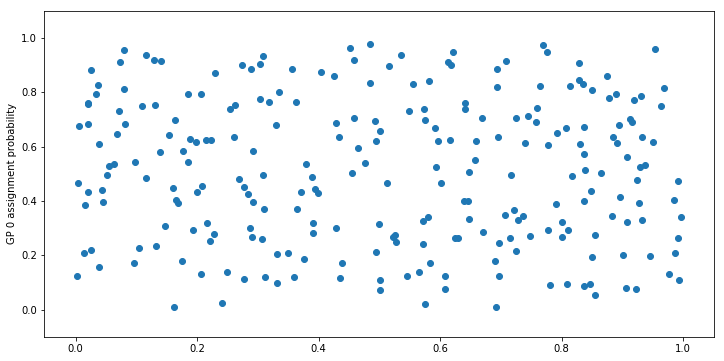

In [6]:
from plotter import OMGPplot_probs
OMGPplot_probs(m, X, gp_num=0)

We can first performa a quick optimization to find the rough trends.

In [7]:
m.optimize(step_length=0.01, maxiter=20)

iteration 1 bound=924.699347487 grad=507.210213302, beta=0
iteration 2 bound=934.521102636 grad=459.798502045, beta=1.01229361088
iteration 3 bound=948.567086132 grad=401.261273325, beta=1.00850691929
iteration 4 bound=965.518316657 grad=352.668833951, beta=0.9588540595
iteration 5 bound=982.042275004 grad=324.858062909, beta=0.81273051323
iteration 6 bound=991.290749034 grad=326.462509042, beta=0.373540407572
iteration 7 bound=1009.49794512 grad=346.951955084, beta=1.60711501179
iteration 8 bound=1038.5967079 grad=399.797492297, beta=1.49385661762
iteration 9 bound=1070.90663027 grad=449.719205346, beta=1.38818545473
iteration 11 bound=1074.65095097 grad=383.342330186, beta=7.57057676731
iteration 12 bound=1082.9750887 grad=366.118451654, beta=1.42680244546
iteration 13 bound=1089.74895 grad=317.841702327, beta=0.524501215069
iteration 14 bound=1096.13939574 grad=270.289469704, beta=0.671712860235
iteration 15 bound=1101.68984956 grad=220.535340551, beta=0.660674433163
iteration 16 bo

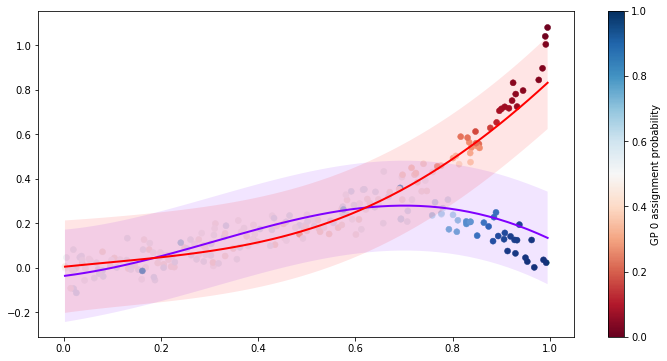

In [8]:
OMGPplot(m,X,Y)

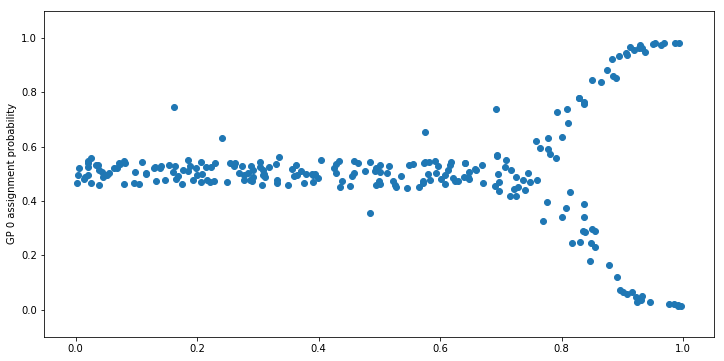

In [9]:
OMGPplot_probs(m,X)

The model identifies the branches of the time series, and in particular the non-branched region have ambigous GP assignment. In this region the two trends share information for prediction.

Like any gpflow model the hyper parameters can be inspected.

In [10]:
m

Name,values,prior,constraint
model.kern.item0.lengthscales,[ 1.],None,+ve
model.kern.item0.variance,[ 1.],None,+ve
model.kern.item1.lengthscales,[ 1.],None,+ve
model.kern.item1.variance,[ 1.],None,+ve
model.noise_variance,[ 0.01],None,+ve


We continue by letting the model optimize some more, and also allow it to optimize the hyper parameters. The hyper parameter optimization works best if the mixture parameters have converged or are close to converging.

In [11]:
m.optimize(step_length=0.01, maxiter=200)

iteration 1 bound=1117.89303091 grad=50.6344570083, beta=0
iteration 2 bound=1118.76917309 grad=47.0396583784, beta=0.914175999022
iteration 3 bound=1119.82429012 grad=40.9873844829, beta=0.843016873412
iteration 4 bound=1120.8852104 grad=34.1536323926, beta=0.798941361576
iteration 5 bound=1121.85882552 grad=27.6592153888, beta=0.783185214849
iteration 6 bound=1122.70749982 grad=21.885333199, beta=0.781981449381
iteration 7 bound=1123.41585832 grad=16.9009049631, beta=0.778449167065
iteration 8 bound=1123.98126596 grad=12.7624875284, beta=0.765849673595
iteration 9 bound=1124.4155825 grad=9.51994790337, beta=0.748654211579
iteration 10 bound=1124.74277045 grad=7.11999240891, beta=0.736667687705
iteration 11 bound=1124.99033657 grad=5.38913047221, beta=0.737604135807
iteration 12 bound=1125.18089598 grad=4.11728661478, beta=0.749412898792
iteration 13 bound=1125.32908235 grad=3.14531555323, beta=0.760165391757
iteration 14 bound=1125.44366123 grad=2.38886850641, beta=0.760220541629
ite

iteration 150 bound=1621.21682004 grad=491.640046751, beta=0.0
iteration 151 bound=1625.73715151 grad=413.943263501, beta=0.0
iteration 152 bound=1626.36325856 grad=543.27671474, beta=0.0
iteration 154 bound=1626.18061269 grad=434.01891847, beta=0.0
iteration 155 bound=1626.72787815 grad=564.580884746, beta=0.0
iteration 157 bound=1626.56017962 grad=461.691328798, beta=0.0
iteration 158 bound=1626.97450422 grad=581.033670671, beta=0.0
iteration 160 bound=1626.89878551 grad=512.724977462, beta=0.0
iteration 161 bound=1627.19287876 grad=595.060668194, beta=0.0
iteration 162 bound=1627.21984074 grad=557.844412417, beta=0.0
iteration 163 bound=1627.48901454 grad=598.915735899, beta=0.0
iteration 164 bound=1627.52942984 grad=564.295667462, beta=0.0
iteration 165 bound=1627.76557938 grad=597.173751353, beta=0.0
iteration 166 bound=1627.8155052 grad=568.278910988, beta=0.0
iteration 167 bound=1628.032329 grad=594.660775803, beta=0.0
iteration 168 bound=1628.08102943 grad=567.923652647, beta=0

In [12]:
m

Name,values,prior,constraint
model.kern.item0.lengthscales,[ 0.23874737],None,+ve
model.kern.item0.variance,[ 0.01901169],None,+ve
model.kern.item1.lengthscales,[ 0.55687459],None,+ve
model.kern.item1.variance,[ 3.81999258],None,+ve
model.noise_variance,[ 0.00090439],None,+ve


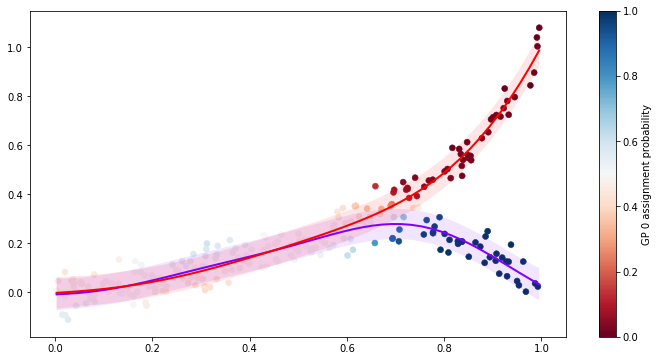

In [13]:
OMGPplot(m,X,Y)

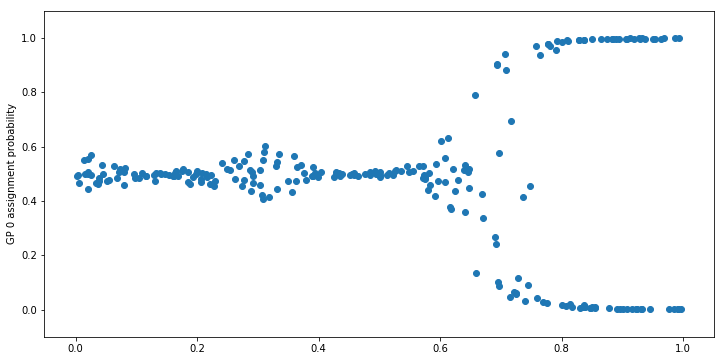

In [14]:
OMGPplot_probs(m,X)

## Separating signal from noise

An interesting application of the OMGP model pointed out in the original publication is the use for robust GP regression.

Let's illustrate this by creating sinusoidal test data with background noise.

In [15]:
x1 = np.random.uniform(0, 10, (100, 1))
x2 = np.random.uniform(0, 10, (100, 1))

y1 = 4 * np.random.randn(*x1.shape)
y2 = 3 * np.sin(x2) + 0.5 * np.random.randn(*x2.shape)
x = np.vstack((x1, x2))
y = np.vstack((y1, y2))

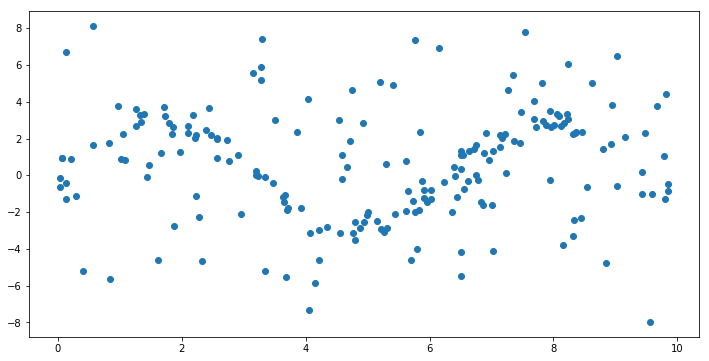

In [16]:
plt.scatter(x, y);

First we make a model with only one mixture component / kernel. This is equivalent to normal GP regression.

In [17]:
kernels = [gpflow.kernels.RBF(1,lengthscales=2.0)]
m = OMGP(x, y, num_clusters=1, prior_Z='DP', kernels=kernels, noise_variance=3.)
m.hyperparam_interval = 100

In [18]:
m.optimize(verbose=False)

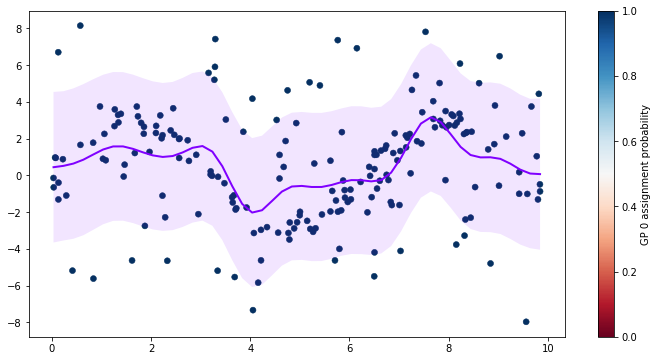

In [19]:
OMGPplot(m,x,y)

Now we in stead view this is a mixture problem, and consider two _different_ kinds of kernels for the different GP components. One encoding white noise, and another which can encode a trend over time (an RBF kernel in this case).

In [20]:
kernels = [gpflow.kernels.White(1), gpflow.kernels.RBF(1, lengthscales=2.0)]
m = OMGP(x, y, num_clusters=2, prior_Z='DP', kernels=kernels, noise_variance=3.)
m.hyperparam_interval = 250

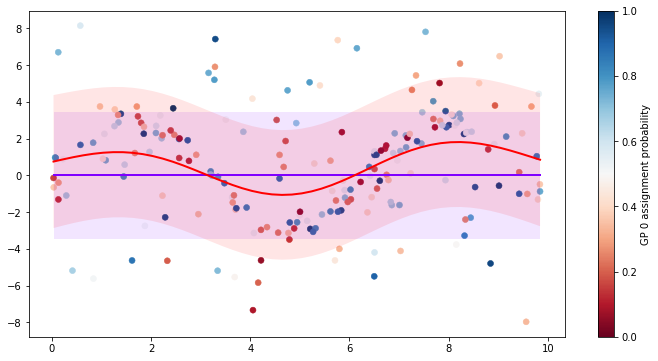

In [21]:
OMGPplot(m,x,y)

In [22]:
m.optimize(step_length=0.01, verbose=False)

In [23]:
m

Name,values,prior,constraint
model.kern.item0.variance,[ 9.38423321],None,+ve
model.kern.item1.lengthscales,[ 1.32022333],None,+ve
model.kern.item1.variance,[ 4.1324801],None,+ve
model.noise_variance,[ 0.11238471],None,+ve


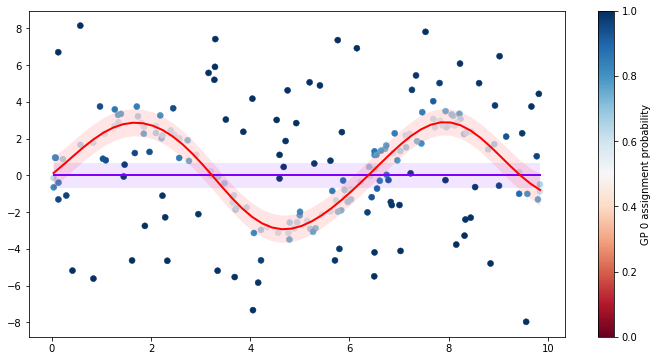

In [24]:
OMGPplot(m,x,y)

The trend over time is much more noticable, and the confidence intervals are smaller.

Noisy points will have high assignment probability to the 'noise GP', while the assignment of the sinusoidal points is ambiguous. We can use this to seperate the points which are more likely to be noise from the remaining points.

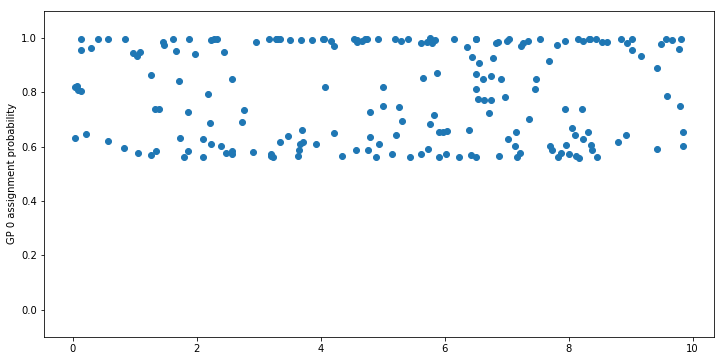

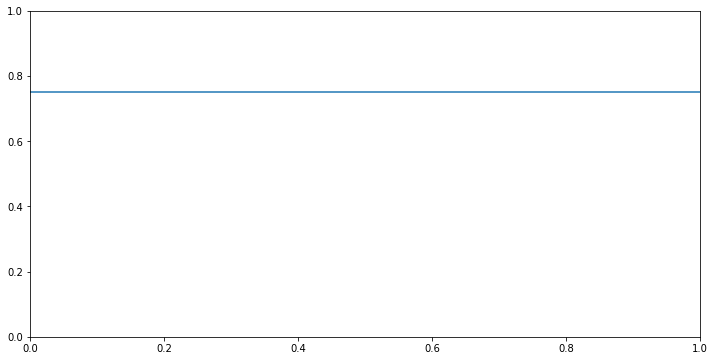

In [25]:
OMGPplot_probs(m,x)
plt.axhline(0.75);

In [26]:
thr = 0.75
phi = m.get_phi()
idx = np.where(phi[:,0] < thr)[0]
nidx = np.where(phi[:,0] >= thr)[0]

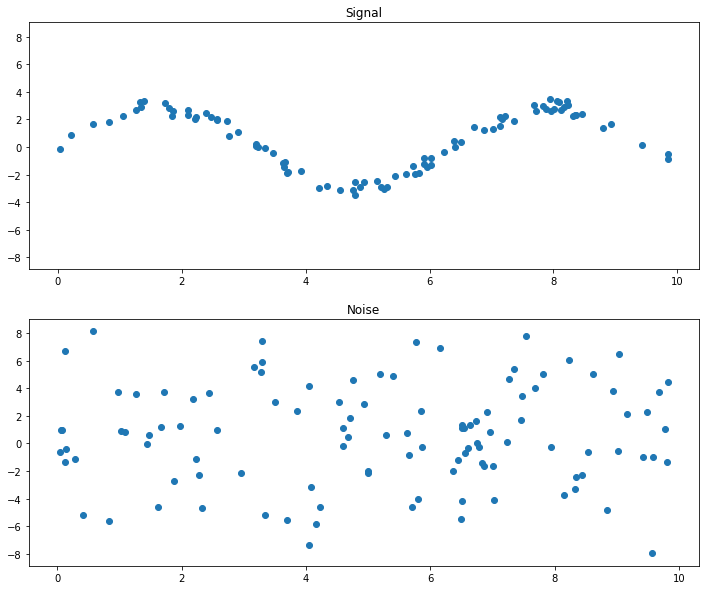

In [27]:
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.scatter(x[idx], y[idx]);
plt.title('Signal')

plt.subplot(212, sharey=plt.gca())
plt.scatter(x[nidx], y[nidx]);
plt.title('Noise');